# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [20]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tqdm

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [2]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)
testloader_stochastic = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

In [4]:
pbar = tqdm(total=len(trainloader_minibatch))
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 1/938 [00:00<01:09, 13.48it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [5]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU()
            )
        # code here
    def forward(self,x):
        output=self.model(x)
        return output
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
models = [SimpleMLP().to(device) for i in range(5)]

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [6]:
# code here
lr=0.01
optimizers =[torch.optim.SGD(models[0].parameters(),lr=lr),torch.optim.SGD(models[1].parameters(), lr=lr, momentum=0.9), torch.optim.SGD(models[2].parameters(),lr=lr,weight_decay=0.0001) ,torch.optim.RMSprop(models[3].parameters(),lr=lr) , torch.optim.Adam(models[4].parameters(), lr=lr)]
criterion = nn.CrossEntropyLoss()
accuracy=np.zeros((len(optimizers),2))
len(optimizers)

5

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


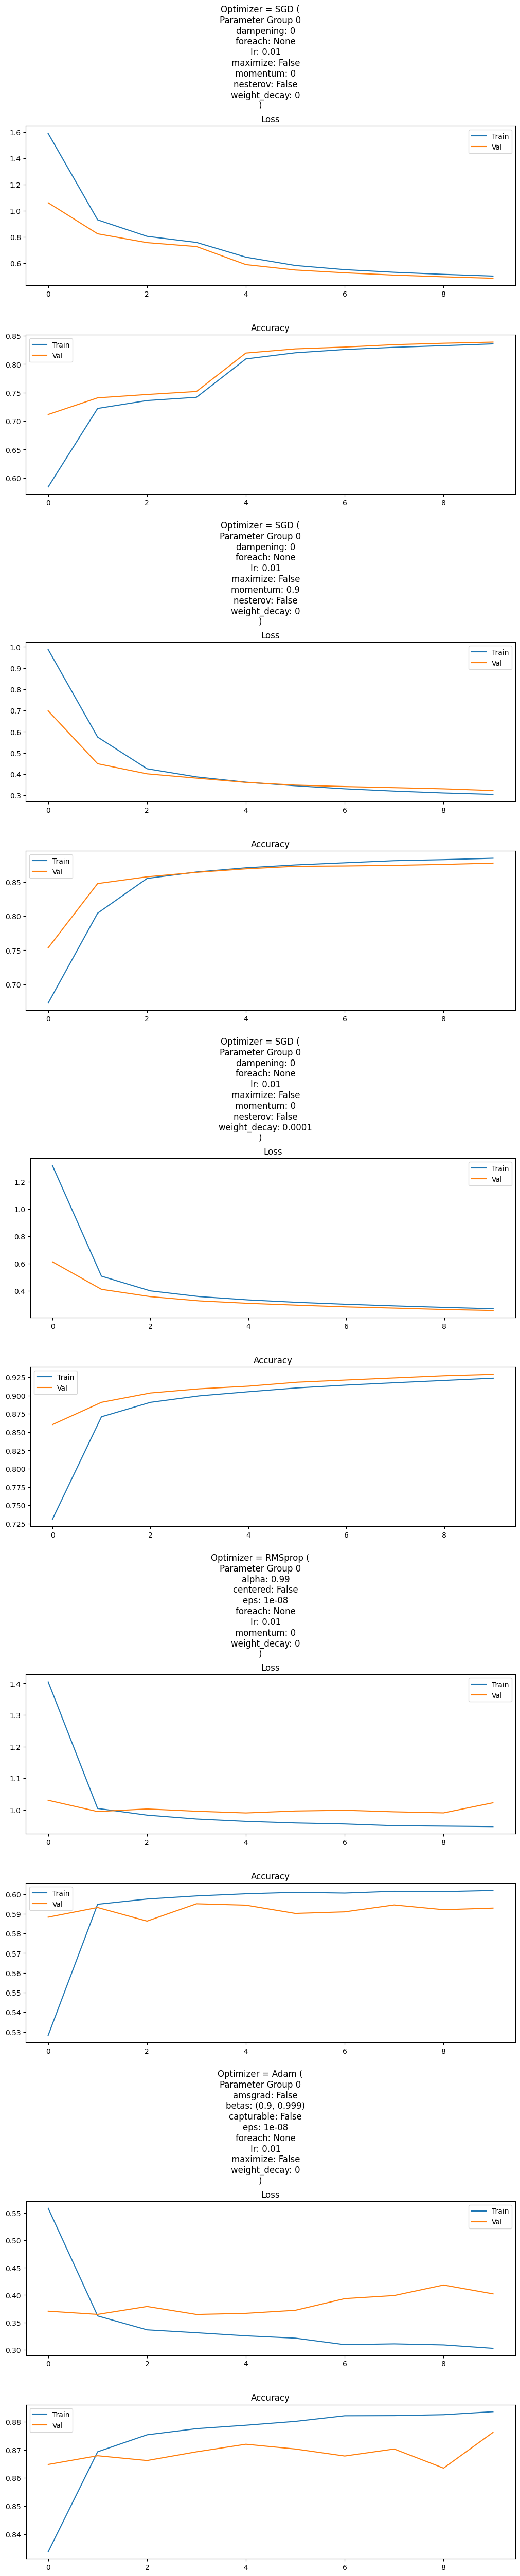

In [7]:
# code, plots and explainiation here
import matplotlib.pyplot as plt
epochs=10
fig = plt.figure(layout='constrained', figsize=(10, 50))
figs =fig.subfigures(len(optimizers),1)
for o in range(len(optimizers)):
    train_loss=[]
    test_loss=[]
    tr_acc=[]
    te_acc=[]
    min_val_loss=1e9
    for e in tqdm(range(epochs)):
        trl,tel=0,0
        tre=0
        tee=0
        c=0
        for batch in trainloader_minibatch:
            x,y =batch
            x=x.to(device)
            y=y.to(device)
            y_pred = models[o](x)
            trloss = criterion(y_pred,y)
            optim = optimizers[o]
            optim.zero_grad()
            trloss.backward()
            optim.step()
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tre+=1
            # tre/=len(sentence)
            trl+=trloss.item()      
        trl/=len(trainloader_minibatch)
        tre/=c  
        # tre/=len(train_dataset)  
        train_loss.append(trl)
        tr_acc.append(tre)
        c=0
        for sentence in testloader_minibatch:
            with torch.no_grad():
                x,y =sentence
                x=x.to(device)
                y=y.to(device)
                y_pred = models[o](x)
                teloss = criterion(y_pred,y)
                temp=torch.argmax(y_pred,dim=1)
                for i,t in enumerate(temp):
                    c+=1
                    if t==y[i]:
                        tee+=1
                        
                # tee/= len(sentence)
                tel+=teloss.item()
        tel/=len(testloader_minibatch)
        # tee/=len(val_dataset)
        tee/= c
        test_loss.append(tel)
        te_acc.append(tee)
        # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
        # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
        if tee< min_val_loss:
            min_val_loss=tee
            accuracy[o,0]=tre
            accuracy[o,1]=tee    
    axes =figs[o].subplots(2,1)
    figs[o].suptitle(f"Optimizer = {optimizers[o]}")
    axes[0].plot(range(epochs),train_loss,label='Train')
    axes[0].plot(range(epochs),test_loss,label='Val')
    axes[0].set_title('Loss')
    axes[0].legend()

    axes[1].plot(range(epochs),tr_acc,label='Train')
    axes[1].plot(range(epochs),te_acc,label='Val')
    axes[1].set_title('Accuracy')
    axes[1].legend()
plt.show()

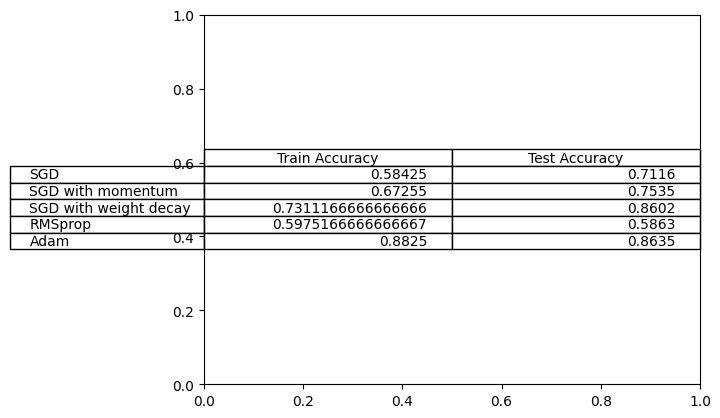

In [8]:
plt.table(cellText=accuracy, rowLabels=['SGD','SGD with momentum','SGD with weight decay','RMSprop','Adam'], colLabels=['Train Accuracy','Test Accuracy'], loc='center')
plt.grid(False)

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


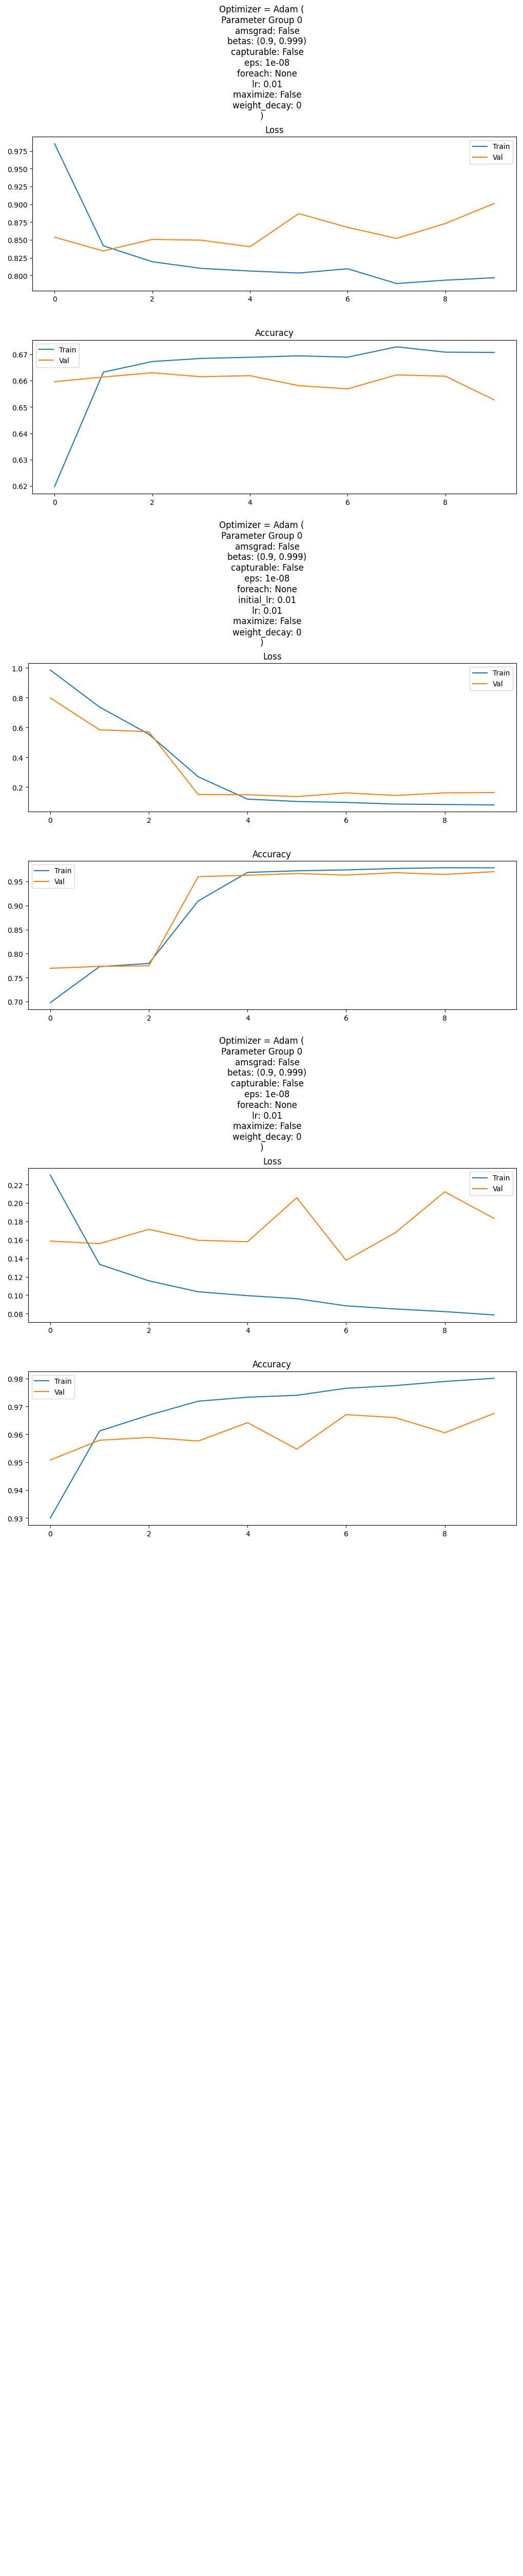

In [9]:
# code and analysis here 
models_1=[SimpleMLP().to(device) for i in range(3)]
optimizers_1=[torch.optim.Adam(models_1[i].parameters(),lr=lr) for i in range(3)]
schedulers = [
    torch.optim.lr_scheduler.ExponentialLR(optimizers_1[1], gamma=0.1),
    torch.optim.lr_scheduler.MultiStepLR(optimizers[2], milestones=[5, 10], gamma=0.1)]
accuracy_1=np.zeros((len(optimizers_1),2))
epochs=10
fig = plt.figure(layout='constrained', figsize=(10, 30))
figs =fig.subfigures(len(optimizers),1)
for o in range(len(optimizers_1)):
    train_loss=[]
    test_loss=[]
    tr_acc=[]
    te_acc=[]
    min_val_loss=1e9
    for e in tqdm(range(epochs)):
        trl,tel=0,0
        tre=0
        tee=0
        c=0
        for batch in trainloader_minibatch:
            x,y =batch
            x=x.to(device)
            y=y.to(device)
            y_pred = models_1[o](x)
            trloss = criterion(y_pred,y)
            optim = optimizers_1[o]
            optim.zero_grad()
            trloss.backward()
            optim.step()
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tre+=1
            # tre/=len(sentence)
            trl+=trloss.item()      
        trl/=len(trainloader_minibatch)
        tre/=c  
        # tre/=len(train_dataset)  
        train_loss.append(trl)
        tr_acc.append(tre)
        c=0
        for sentence in testloader_minibatch:
            with torch.no_grad():
                x,y =sentence
                x=x.to(device)
                y=y.to(device)
                y_pred = models_1[o](x)
                teloss = criterion(y_pred,y)
                temp=torch.argmax(y_pred,dim=1)
                for i,t in enumerate(temp):
                    c+=1
                    if t==y[i]:
                        tee+=1
                        
                # tee/= len(sentence)
                tel+=teloss.item()
        tel/=len(testloader_minibatch)
        # tee/=len(val_dataset)
        tee/= c
        test_loss.append(tel)
        te_acc.append(tee)
        # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
        # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
        if tee< min_val_loss:
            min_val_loss=tee
            accuracy_1[o,0]=tre
            accuracy_1[o,1]=tee    
    axes =figs[o].subplots(2,1)
    figs[o].suptitle(f"Optimizer = {optimizers_1[o]}")
    axes[0].plot(range(epochs),train_loss,label='Train')
    axes[0].plot(range(epochs),test_loss,label='Val')
    axes[0].set_title('Loss')
    axes[0].legend()

    axes[1].plot(range(epochs),tr_acc,label='Train')
    axes[1].plot(range(epochs),te_acc,label='Val')
    axes[1].set_title('Accuracy')
    axes[1].legend()
plt.show()


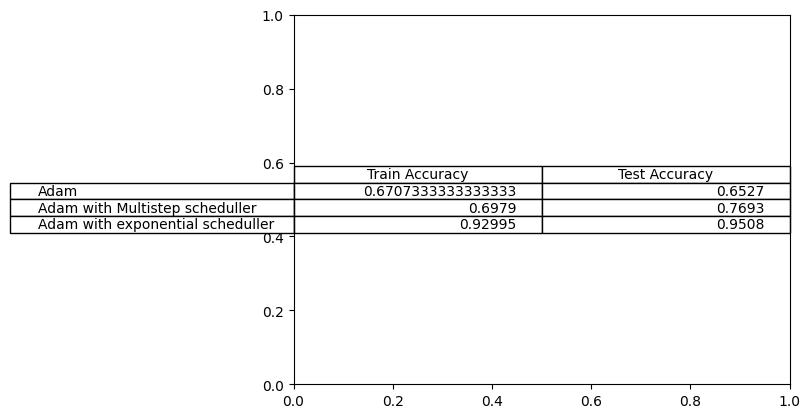

In [18]:
plt.table(cellText=accuracy_1, rowLabels=['Adam','Adam with Multistep scheduller','Adam with exponential scheduller'], colLabels=['Train Accuracy','Test Accuracy'], loc='center',)
plt.grid(False)
plt.show()

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [12]:
class SimpleMLP_1(nn.Module):
    def __init__(self):
        super(SimpleMLP_1,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU()
            )
        # code here
    def forward(self,x):
        output=self.model(x)
        return output

class SimpleMLP_2(nn.Module):
    def __init__(self):
        super(SimpleMLP_2,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(100, 10),
            nn.ReLU()
            )
        # code here
    def forward(self,x):
        output=self.model(x)
        return output

class SimpleMLP_3(nn.Module):
    def __init__(self):
        super(SimpleMLP_3,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(100, 10),
            nn.ReLU()
            )
        # code here
    def forward(self,x):
        output=self.model(x)
        return output

model1 = SimpleMLP_1().to(device)
model2= SimpleMLP_2().to(device)
model3= SimpleMLP_3().to(device)
Models=[model1,model2,model3]

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

100%|██████████| 10/10 [00:35<00:00,  3.59s/it]


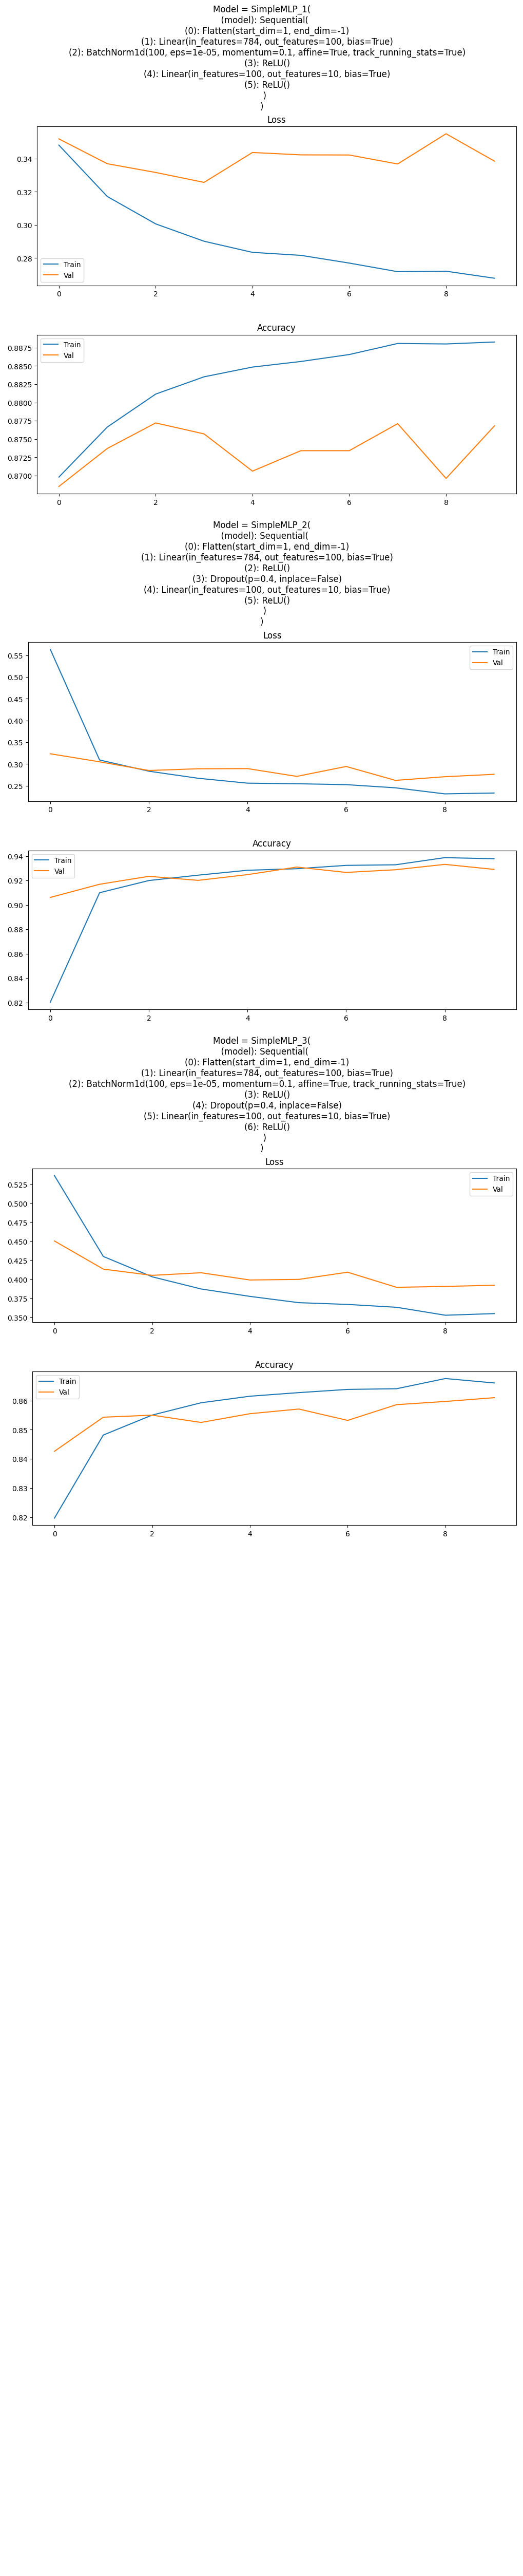

In [24]:
accuracy2 = np.zeros((3,2))
epochs=10
fig = plt.figure(layout='constrained', figsize=(10, 25))
figs =fig.subfigures(len(optimizers),1)
for o,mode in enumerate(Models):
    optim = torch.optim.Adam(mode.parameters(),lr=lr) 
    train_loss=[]
    test_loss=[]
    tr_acc=[]
    te_acc=[]
    min_val_loss=1e9
    for e in tqdm(range(epochs)):
        trl,tel=0,0
        tre=0
        tee=0
        c=0
        for batch in trainloader_minibatch:
            x,y =batch
            x=x.to(device)
            y=y.to(device)
            y_pred = mode(x)
            trloss = criterion(y_pred,y)
            optim.zero_grad()
            trloss.backward()
            optim.step()
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tre+=1
            # tre/=len(sentence)
            trl+=trloss.item()      
        trl/=len(trainloader_minibatch)
        tre/=c  
        # tre/=len(train_dataset)  
        train_loss.append(trl)
        tr_acc.append(tre)
        c=0
        for sentence in testloader_minibatch:
            with torch.no_grad():
                x,y =sentence
                x=x.to(device)
                y=y.to(device)
                y_pred = mode(x)
                teloss = criterion(y_pred,y)
                temp=torch.argmax(y_pred,dim=1)
                for i,t in enumerate(temp):
                    c+=1
                    if t==y[i]:
                        tee+=1
                        
                # tee/= len(sentence)
                tel+=teloss.item()
        tel/=len(testloader_minibatch)
        # tee/=len(val_dataset)
        tee/= c
        test_loss.append(tel)
        te_acc.append(tee)
        # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
        # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
        if tee< min_val_loss:
            min_val_loss=tee
            accuracy2[o,0]=tre
            accuracy2[o,1]=tee    
    axes =figs[o].subplots(2,1)
    figs[o].suptitle(f"Model = {mode}")
    axes[0].plot(range(epochs),train_loss,label='Train')
    axes[0].plot(range(epochs),test_loss,label='Val')
    axes[0].set_title('Loss')
    axes[0].legend()

    axes[1].plot(range(epochs),tr_acc,label='Train')
    axes[1].plot(range(epochs),te_acc,label='Val')
    axes[1].set_title('Accuracy')
    axes[1].legend()
plt.show()

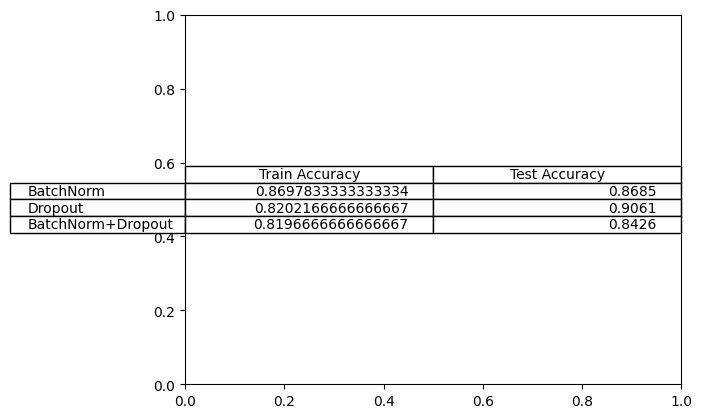

In [25]:
plt.table(cellText=accuracy2, rowLabels=['BatchNorm','Dropout','BatchNorm+Dropout'], colLabels=['Train Accuracy','Test Accuracy'], loc='center',)
plt.grid(False)
plt.show()

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

100%|██████████| 10/10 [00:33<00:00,  3.38s/it]

Train Accuracy = 0.5748333333333333 and Test Accuracy = 0.6289


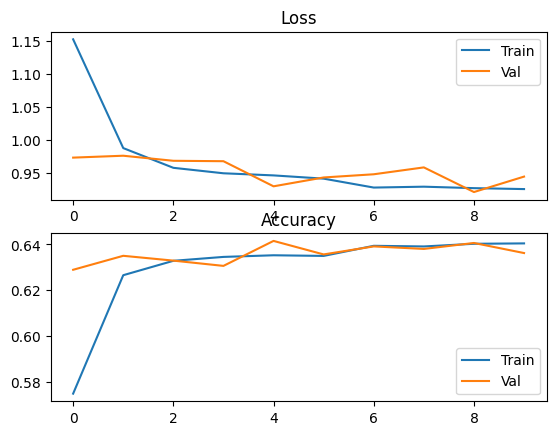

In [28]:
# code here
model = SimpleMLP_2().to(device)
optim = torch.optim.Adam(model.parameters(),lr=lr)
scheduler=torch.optim.lr_scheduler.ExponentialLR(optim,gamma=0.1)

train_loss=[]
test_loss=[]
tr_acc=[]
te_acc=[]
min_val_loss=1e9
train_accuracy=0
test_accuracy=0
for e in tqdm(range(epochs)):
    trl,tel=0,0
    tre=0
    tee=0
    c=0
    for batch in trainloader_minibatch:
        x,y =batch
        x=x.to(device)
        y=y.to(device)
        y_pred = model(x)
        trloss = criterion(y_pred,y)
        optim.zero_grad()
        trloss.backward()
        optim.step()
        temp=torch.argmax(y_pred,dim=1)
        for i,t in enumerate(temp):
            c+=1
            if t==y[i]:
                tre+=1
        # tre/=len(sentence)
        trl+=trloss.item()      
    trl/=len(trainloader_minibatch)
    tre/=c  
    # tre/=len(train_dataset)  
    train_loss.append(trl)
    tr_acc.append(tre)
    c=0
    for sentence in testloader_minibatch:
        with torch.no_grad():
            x,y =sentence
            x=x.to(device)
            y=y.to(device)
            y_pred = model(x)
            teloss = criterion(y_pred,y)
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tee+=1
                    
            # tee/= len(sentence)
            tel+=teloss.item()
    tel/=len(testloader_minibatch)
    # tee/=len(val_dataset)
    tee/= c
    test_loss.append(tel)
    te_acc.append(tee)
    # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
    # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
    if tee< min_val_loss:
        min_val_loss=tee
        train_accuracy=tre
        test_accuracy=tee    
fig,axes =plt.subplots(2,1)
print(f"Train Accuracy = {train_accuracy} and Test Accuracy = {test_accuracy}")

axes[0].plot(range(epochs),train_loss,label='Train')
axes[0].plot(range(epochs),test_loss,label='Val')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(epochs),tr_acc,label='Train')
axes[1].plot(range(epochs),te_acc,label='Val')
axes[1].set_title('Accuracy')
axes[1].legend()


100%|██████████| 10/10 [15:27<00:00, 92.78s/it]

Train Accuracy = 0.0988 and Test Accuracy = 0.098


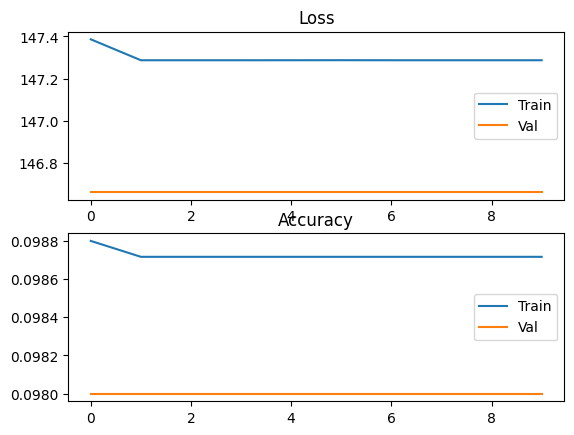

In [30]:
# code here
model = SimpleMLP_2().to(device)
optim = torch.optim.Adam(model.parameters(),lr=lr)
scheduler=torch.optim.lr_scheduler.ExponentialLR(optim,gamma=0.1)

train_loss=[]
test_loss=[]
tr_acc=[]
te_acc=[]
min_val_loss=1e9
train_accuracy=0
test_accuracy=0
for e in tqdm(range(epochs)):
    trl,tel=0,0
    tre=0
    tee=0
    c=0
    for batch in trainloader_stochastic:
        x,y =batch
        x=x.to(device)
        y=y.to(device)
        y_pred = model(x)
        trloss = criterion(y_pred,y)
        optim.zero_grad()
        trloss.backward()
        optim.step()
        temp=torch.argmax(y_pred,dim=1)
        for i,t in enumerate(temp):
            c+=1
            if t==y[i]:
                tre+=1
        # tre/=len(sentence)
        trl+=trloss.item()      
    trl/=len(trainloader_minibatch)
    tre/=c  
    # tre/=len(train_dataset)  
    train_loss.append(trl)
    tr_acc.append(tre)
    c=0
    for sentence in testloader_stochastic:
        with torch.no_grad():
            x,y =sentence
            x=x.to(device)
            y=y.to(device)
            y_pred = model(x)
            teloss = criterion(y_pred,y)
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tee+=1
                    
            # tee/= len(sentence)
            tel+=teloss.item()
    tel/=len(testloader_minibatch)
    # tee/=len(val_dataset)
    tee/= c
    test_loss.append(tel)
    te_acc.append(tee)
    # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
    # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
    if tee< min_val_loss:
        min_val_loss=tee
        train_accuracy=tre
        test_accuracy=tee    
fig,axes =plt.subplots(2,1)
print(f"Train Accuracy = {train_accuracy} and Test Accuracy = {test_accuracy}")

axes[0].plot(range(epochs),train_loss,label='Train')
axes[0].plot(range(epochs),test_loss,label='Val')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(epochs),tr_acc,label='Train')
axes[1].plot(range(epochs),te_acc,label='Val')
axes[1].set_title('Accuracy')
axes[1].legend()


### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

#### Different Optimizers
Considering that we are running our model on quite low number of epochs(10), Adam is seen to converge faster than other optimizers. SGD with weight decay also gives comparative results. RMS perform the poorest among all the optimizers. The convergence rate is also slower in case of RMS prop and simple SGD.

### Schedulers
Schedulers are highly useful, if we don't want to be trapped in local minima. Exponential Learning rate schedullers perform the best in our case with adam optimizers.

### Batch Normalization and Dropout
Batch Normalization and Dropout both increase the accuracy of the model. Batch Normalization and Dropout both helps the model to converge by avoiding overfitting. Dropout seems to be more effective in our case.

### Minibatch vs Stochastic
Using a suitable batch size is always preferred than sending data one by one. Accuracy drops greatly when trying to send data one by one. In addition to that training time increases significantly.

